# Naukri.com Job Posting Analysis

## **Introduction**

### The aim of this project is to analyze job postings data to uncover key hiring trends in the job market. This includes analyzing:
### 1. **Top hiring companies** across various roles.
### 2.  **Geographic locations** with the highest job opportunities.
### 3. **Experience and salary** trends for different roles.
### 4. **Common responsibilities** and skills required for popular roles.

### The analysis is helpful for job seekers and industry analysts to understand current trends, optimize job searches, and identify roles in demand.


### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading the data

In [2]:
df = pd.read_csv("jobs.csv")

In [3]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
79142,6.012301e+10,.Net Fullstack Developer,Citiustech,3-8 Yrs,"7,00,000 - 17,00,000 PA.","Hybrid - Pune, Bangalore/Bengaluru, Mumbai (Al...",4.0,742 Reviews,"c#,.net core,javascript,Microservices,Angular,...",2 Days Ago,https://www.naukri.com/job-listings-net-fullst...,https://www.naukri.com/citiustech-jobs-careers...
79143,1.122201e+10,Senior (BI) Business Intelligence Architect,Hexaware Technologies,10-13 Yrs,Not disclosed,"Hybrid - Pune, Chennai, Bangalore/Bengaluru, M...",3.7,3172 Reviews,"Informatica Mdm,etl,business intelligence,Agil...",1 Day Ago,https://www.naukri.com/job-listings-senior-bi-...,https://www.naukri.com/hexaware-technologies-j...
79144,1.512220e+11,PowerBI Developer,EY,5-10 Yrs,Not disclosed,"Hybrid - Pune, Mumbai (All Areas)",3.8,6267 Reviews,"pagination,Power Bi,Dax",2 Days Ago,https://www.naukri.com/job-listings-powerbi-de...,https://www.naukri.com/ey-jobs-careers-9156
79145,2.712220e+11,Customer Service Associate,Tech Mahindra,0-2 Yrs,"2,50,000 - 3,50,000 PA.","Temp. WFH - Noida, Kolkata, New Delhi, Hyderab...",3.7,21440 Reviews,"Bengali,International BPO,BPO,Customer Service...",10 Days Ago,https://www.naukri.com/job-listings-customer-s...,https://www.naukri.com/tech-mahindra-jobs-care...


### Exploring the Data and Cleaning

In [4]:
df.describe()

,job_id,rating
count,7.866700e+04,42948.000000
mean,1.255071e+11,3.940144
std,1.097464e+11,0.519211
min,1.012200e+10,1.000000
25%,4.012350e+10,3.700000
50%,6.012350e+10,4.000000
75%,2.610226e+11,4.200000
max,3.112229e+11,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79147 entries, 0 to 79146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           78667 non-null  float64
 1   job_role         78667 non-null  object 
 2   company          78666 non-null  object 
 3   experience       77398 non-null  object 
 4   salary           78667 non-null  object 
 5   location         77441 non-null  object 
 6   rating           42948 non-null  float64
 7   reviews          42948 non-null  object 
 8   resposibilities  78647 non-null  object 
 9   posted_on        78667 non-null  object 
 10  job_link         78667 non-null  object 
 11  company_link     78667 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


In [6]:
df.isnull().sum()

job_id               480
job_role             480
company              481
experience          1749
salary               480
location            1706
rating             36199
reviews            36199
resposibilities      500
posted_on            480
job_link             480
company_link         480
dtype: int64

In [7]:
df['job_id'].drop_duplicates()

0        7.012301e+10
1        6.012391e+10
2        6.012391e+10
3        6.012391e+10
4        6.012301e+10
             ...     
73762    2.012300e+10
73763    2.012300e+10
73764    2.312220e+11
73765    1.712200e+11
73766    7.102201e+10
Name: job_id, Length: 73010, dtype: float64

In [8]:
df.drop_duplicates(subset='job_id', inplace=True)


In [9]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
73762,2.012300e+10,Partner Success Executive/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Jalandhar, Chandigarh, Amritsar",NaN,NaN,"CRM,Communication Skills,Presentation Skills,C...",6 Days Ago,https://www.naukri.com/job-listings-partner-su...,https://www.naukri.com/parth-associates-jobs-c...
73763,2.012300e+10,Partner Success Associate/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Ludhiana, Patiala, Moga",NaN,NaN,"CRM,Communication Skills,Presentation Skills,C...",6 Days Ago,https://www.naukri.com/job-listings-partner-su...,https://www.naukri.com/parth-associates-jobs-c...
73764,2.312220e+11,Hiring For International Voice Process | Gurga...,First Step Solutions,1-4 Yrs,"3,00,000 - 4,50,000 PA.","New Delhi, Gurgaon/Gurugram",NaN,NaN,"Customer Service,US Process,Hospitality,Custom...",10 Days Ago,https://www.naukri.com/job-listings-hiring-for...,https://www.naukri.com/first-step-solutions-jo...
73765,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3 Reviews,"ENGINEERING,B Tech Fresher,AutoCAD,Degree,PLC,...",2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403


In [10]:
df['company']

0                    Hdfc Bank
1                    Accenture
2                    Accenture
3                    Accenture
4                     Mindtree
                 ...          
73762         Parth Associates
73763         Parth Associates
73764     First Step Solutions
73765                   Sofcon
73766    Indian Healthcare BPO
Name: company, Length: 73010, dtype: object

In [11]:
df = df.dropna()

In [52]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
73743,3.101901e+10,Design Engineer,Sofcon,0-2 Yrs,Not disclosed,"Gandhinagar, Ahmedabad, Rajkot",2.8,3 Reviews,"Diploma,B Tech Fresher,AutoCAD,Degree,PLC,Elec...",2 Days Ago,https://www.naukri.com/job-listings-design-eng...,https://www.naukri.com/sofcon-jobs-careers-110403
73744,3.101901e+10,Maintenance Engineer,Sofcon,0-2 Yrs,Not disclosed,"Mehsana, Gandhinagar, Ahmedabad",2.8,3 Reviews,"ENGINEERING,B Tech Fresher,AutoCAD,Degree,PLC,...",2 Days Ago,https://www.naukri.com/job-listings-maintenanc...,https://www.naukri.com/sofcon-jobs-careers-110403
73753,1.905220e+11,Production Engineer,Sofcon,1-1 Yrs,Not disclosed,"Bhavnagar, Mehsana, Gandhinagar, Ahmedabad, Ra...",2.8,3 Reviews,"PLC,Electrical,Distributed Control System,Prog...",2 Days Ago,https://www.naukri.com/job-listings-production...,https://www.naukri.com/sofcon-jobs-careers-110403
73754,1.905220e+11,Industrial Automation Trainer,Sofcon,0-2 Yrs,Not disclosed,"New Delhi, Delhi / NCR",2.8,3 Reviews,"PLC,HMI,Electronics Testing,Panel Designing,Pr...",2 Days Ago,https://www.naukri.com/job-listings-industrial...,https://www.naukri.com/sofcon-jobs-careers-110403


### Preparing data for analysis 

In [14]:
df['reviews'] = df['reviews'].str.extract('(\d+)').astype('int')

AttributeError: Can only use .str accessor with string values!

In [15]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
73743,3.101901e+10,Design Engineer,Sofcon,0-2 Yrs,Not disclosed,"Gandhinagar, Ahmedabad, Rajkot",2.8,3,"Diploma,B Tech Fresher,AutoCAD,Degree,PLC,Elec...",2 Days Ago,https://www.naukri.com/job-listings-design-eng...,https://www.naukri.com/sofcon-jobs-careers-110403
73744,3.101901e+10,Maintenance Engineer,Sofcon,0-2 Yrs,Not disclosed,"Mehsana, Gandhinagar, Ahmedabad",2.8,3,"ENGINEERING,B Tech Fresher,AutoCAD,Degree,PLC,...",2 Days Ago,https://www.naukri.com/job-listings-maintenanc...,https://www.naukri.com/sofcon-jobs-careers-110403
73753,1.905220e+11,Production Engineer,Sofcon,1-1 Yrs,Not disclosed,"Bhavnagar, Mehsana, Gandhinagar, Ahmedabad, Ra...",2.8,3,"PLC,Electrical,Distributed Control System,Prog...",2 Days Ago,https://www.naukri.com/job-listings-production...,https://www.naukri.com/sofcon-jobs-careers-110403
73754,1.905220e+11,Industrial Automation Trainer,Sofcon,0-2 Yrs,Not disclosed,"New Delhi, Delhi / NCR",2.8,3,"PLC,HMI,Electronics Testing,Panel Designing,Pr...",2 Days Ago,https://www.naukri.com/job-listings-industrial...,https://www.naukri.com/sofcon-jobs-careers-110403


In [16]:
all_resposibilities = df['resposibilities'].str.lower().str.split(",").explode()


In [17]:
all_resposibilities.value_counts().sort_values(ascending = False)

resposibilities
sales                  2570
communication          2219
consulting             2032
analytical             1905
management             1560
                       ... 
google sites              1
h1 transfer               1
child specialist          1
customare care            1
electronics testing       1
Name: count, Length: 26114, dtype: int64

In [18]:
df['resposibilities'] = df['resposibilities'].str.lower().str.split(",")
df = df.explode('resposibilities').reset_index(drop=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_9676\1658617424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resposibilities'] = df['resposibilities'].str.lower().str.split(",")


In [19]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110,customer service,1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110,sales,1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
2,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110,relationship management,1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
3,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,product management,1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,market analysis,1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
...,...,...,...,...,...,...,...,...,...,...,...,...
239543,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3,degree,2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403
239544,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3,plc,2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403
239545,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3,electronics,2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403
239546,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3,drives,2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403


In [20]:
df['location'] = df['location'].str.lower().str.split(",")
df = df.explode('location').reset_index(drop=True)

In [21]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,kolkata,4.0,39110,customer service,1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,hyderabad/secunderabad,4.0,39110,customer service,1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
2,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,pune,4.0,39110,customer service,1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
3,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,ahmedabad,4.0,39110,customer service,1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
4,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,chennai,4.0,39110,customer service,1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
...,...,...,...,...,...,...,...,...,...,...,...,...
343963,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,jaipur,2.8,3,instrumentation,2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403
343964,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,alwar,2.8,3,instrumentation,2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403
343965,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,jaisalmer,2.8,3,instrumentation,2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403
343966,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,bikaner,2.8,3,instrumentation,2 Days Ago,https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403


In [22]:
df = df.drop(columns = ["job_link","company_link"])

In [23]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,kolkata,4.0,39110,customer service,1 Day Ago
1,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,hyderabad/secunderabad,4.0,39110,customer service,1 Day Ago
2,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,pune,4.0,39110,customer service,1 Day Ago
3,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,ahmedabad,4.0,39110,customer service,1 Day Ago
4,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,chennai,4.0,39110,customer service,1 Day Ago
...,...,...,...,...,...,...,...,...,...,...
343963,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,jaipur,2.8,3,instrumentation,2 Days Ago
343964,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,alwar,2.8,3,instrumentation,2 Days Ago
343965,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,jaisalmer,2.8,3,instrumentation,2 Days Ago
343966,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,bikaner,2.8,3,instrumentation,2 Days Ago


In [24]:
df[['min_exp', 'max_exp']] = df['experience'].str.split('-', expand=True)
df['min_exp'] = df['min_exp'].astype(int)  # Convert to integer
df['max_exp'] = df['max_exp'].str.extract('(\d+)').astype(int)

In [25]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,min_exp,max_exp
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,kolkata,4.0,39110,customer service,1 Day Ago,1,6
1,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,hyderabad/secunderabad,4.0,39110,customer service,1 Day Ago,1,6
2,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,pune,4.0,39110,customer service,1 Day Ago,1,6
3,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,ahmedabad,4.0,39110,customer service,1 Day Ago,1,6
4,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,chennai,4.0,39110,customer service,1 Day Ago,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
343963,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,jaipur,2.8,3,instrumentation,2 Days Ago,0,2
343964,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,alwar,2.8,3,instrumentation,2 Days Ago,0,2
343965,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,jaisalmer,2.8,3,instrumentation,2 Days Ago,0,2
343966,1.712200e+11,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,bikaner,2.8,3,instrumentation,2 Days Ago,0,2


### Writing Functions so that user is able to find jobs according to his prefrences

### These will help the job seeker to filter out jobs based on **job role**, **location** and **experience** making it easy for them to find their ideal Job

In [26]:
def filtered_jobs_posts(candidate_exp,df):
    filtered_jobs = df[
        (df['min_exp'] <= candidate_exp) & (df['max_exp'] >= candidate_exp)
    ]
    return filtered_jobs

candidate_exp = int(input("Your Experience ="))
matching_jobs = filtered_jobs_posts(candidate_exp, df)

# Display matching jobs
print(matching_jobs)

Your Experience =10
              job_id                                           job_role  \
259     6.012301e+10  ServiceNow Consultants / Sr. Consultants ( Dev...   
260     6.012301e+10  ServiceNow Consultants / Sr. Consultants ( Dev...   
261     6.012301e+10  ServiceNow Consultants / Sr. Consultants ( Dev...   
262     6.012301e+10  ServiceNow Consultants / Sr. Consultants ( Dev...   
263     6.012301e+10  ServiceNow Consultants / Sr. Consultants ( Dev...   
...              ...                                                ...   
342991  6.012350e+10                                   Credit Assmt Mgr   
342992  6.012350e+10                                   Credit Assmt Mgr   
342993  6.012350e+10                                   Credit Assmt Mgr   
342994  6.012350e+10                                   Credit Assmt Mgr   
342995  6.012350e+10                                   Credit Assmt Mgr   

         company experience         salary                 location  rating  \


In [64]:
matching_jobs

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,min_exp,max_exp
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,kolkata,4.0,39110,customer service,1 Day Ago,1,6
1,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,hyderabad/secunderabad,4.0,39110,customer service,1 Day Ago,1,6
2,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,pune,4.0,39110,customer service,1 Day Ago,1,6
3,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,ahmedabad,4.0,39110,customer service,1 Day Ago,1,6
4,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,chennai,4.0,39110,customer service,1 Day Ago,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
343203,6.012350e+10,Digital & OOH Marketing Officer,Odoo,1-5 Yrs,Not disclosed,gandhinagar,3.2,10,advertising,2 Days Ago,1,5
343660,4.012361e+10,Marketing Intelligence- Research Analyst,Codemantra,2-5 Yrs,"6,00,000 - 14,00,000 PA.",permanent remote,3.5,56,communication,4 Days Ago,2,5
343661,4.012361e+10,Marketing Intelligence- Research Analyst,Codemantra,2-5 Yrs,"6,00,000 - 14,00,000 PA.",permanent remote,3.5,56,written,4 Days Ago,2,5
343662,4.012361e+10,Marketing Intelligence- Research Analyst,Codemantra,2-5 Yrs,"6,00,000 - 14,00,000 PA.",permanent remote,3.5,56,primary market research,4 Days Ago,2,5


In [27]:
def filtered_posts(candidate_skills,df):
    filtered_jobss = df[
        (df['resposibilities'].str.lower() == candidate_skills)
    ]
    return filtered_jobss

candidate_skills = str(input("input skill ="))
matched_jobs = filtered_posts(candidate_skills, df)

# Display matching jobs
print(matched_jobs)

input skill =python
              job_id                                           job_role  \
349     5.012301e+10  C++ Developer (Looking For immediate joiners o...   
350     5.012301e+10  C++ Developer (Looking For immediate joiners o...   
351     5.012301e+10  C++ Developer (Looking For immediate joiners o...   
352     5.012301e+10  C++ Developer (Looking For immediate joiners o...   
353     5.012301e+10  C++ Developer (Looking For immediate joiners o...   
...              ...                                                ...   
334005  3.012300e+10                                       BI Developer   
335862  1.112201e+10                                Technical Architect   
340145  2.912220e+11  Senior IoT Engineer | Product Based Company | ...   
341636  1.411220e+11                                     Technical Lead   
341993  9.122201e+10                 Backend Developer - Python/ Django   

                            company experience                     salary  \
34

In [62]:
matched_jobs

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,min_exp,max_exp
349,5.012301e+10,C++ Developer (Looking For immediate joiners o...,Capgemini,5-10 Yrs,Not disclosed,hybrid - kolkata,3.9,23786,python,3 Days Ago,5,10
350,5.012301e+10,C++ Developer (Looking For immediate joiners o...,Capgemini,5-10 Yrs,Not disclosed,hyderabad/secunderabad,3.9,23786,python,3 Days Ago,5,10
351,5.012301e+10,C++ Developer (Looking For immediate joiners o...,Capgemini,5-10 Yrs,Not disclosed,pune,3.9,23786,python,3 Days Ago,5,10
352,5.012301e+10,C++ Developer (Looking For immediate joiners o...,Capgemini,5-10 Yrs,Not disclosed,ahmedabad,3.9,23786,python,3 Days Ago,5,10
353,5.012301e+10,C++ Developer (Looking For immediate joiners o...,Capgemini,5-10 Yrs,Not disclosed,chennai,3.9,23786,python,3 Days Ago,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...
334005,3.012300e+10,BI Developer,BEO Software,3-8 Yrs,Not disclosed,kochi/cochin,4.7,127,python,5 Days Ago,3,8
335862,1.112201e+10,Technical Architect,Biz2Credit,6-11 Yrs,Not disclosed,delhi / ncr,4.4,169,python,5 Days Ago,6,11
340145,2.912220e+11,Senior IoT Engineer | Product Based Company | ...,Statiq,3-6 Yrs,Not disclosed,gurgaon/gurugram,5.0,2,python,10 Days Ago,3,6
341636,1.411220e+11,Technical Lead,Numinolabs,6-11 Yrs,"12,00,000 - 22,00,000 PA.",hybrid - mangaluru/mangalore,4.8,4,python,2 Days Ago,6,11


In [29]:
def filtered_jobs(role,df):
    filtered_jobs_ = df[
        (df['job_role'].str.lower() == role )
    ]
    return filtered_jobs_

role = str(input("Role You are Seeking ="))
matches = filtered_jobs(role, df)

# Display matching jobs
print(matches)

Role You are Seeking =data analyst
              job_id      job_role           company experience  \
3451    6.012301e+10  Data Analyst   Publicis Groupe    3-5 Yrs   
3452    6.012301e+10  Data Analyst   Publicis Groupe    3-5 Yrs   
3453    6.012301e+10  Data Analyst   Publicis Groupe    3-5 Yrs   
3454    6.012301e+10  Data Analyst   Publicis Groupe    3-5 Yrs   
3455    6.012301e+10  Data Analyst   Publicis Groupe    3-5 Yrs   
...              ...           ...               ...        ...   
333921  3.012300e+10  Data Analyst  Express Roadways    1-3 Yrs   
333922  3.012300e+10  Data Analyst  Express Roadways    1-3 Yrs   
333923  3.012300e+10  Data Analyst  Express Roadways    1-3 Yrs   
333924  3.012300e+10  Data Analyst  Express Roadways    1-3 Yrs   
333925  3.012300e+10  Data Analyst  Express Roadways    1-3 Yrs   

                          salary              location  rating  reviews  \
3451    8,00,000 - 12,00,000 PA.                  pune     3.7     2060   
3452    8,

In [63]:
matches

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,min_exp,max_exp
3451,6.012301e+10,Data Analyst,Publicis Groupe,3-5 Yrs,"8,00,000 - 12,00,000 PA.",pune,3.7,2060,big query,1 Day Ago,3,5
3452,6.012301e+10,Data Analyst,Publicis Groupe,3-5 Yrs,"8,00,000 - 12,00,000 PA.",ahmedabad,3.7,2060,big query,1 Day Ago,3,5
3453,6.012301e+10,Data Analyst,Publicis Groupe,3-5 Yrs,"8,00,000 - 12,00,000 PA.",gurgaon/gurugram,3.7,2060,big query,1 Day Ago,3,5
3454,6.012301e+10,Data Analyst,Publicis Groupe,3-5 Yrs,"8,00,000 - 12,00,000 PA.",bangalore/bengaluru,3.7,2060,big query,1 Day Ago,3,5
3455,6.012301e+10,Data Analyst,Publicis Groupe,3-5 Yrs,"8,00,000 - 12,00,000 PA.",mumbai (all areas),3.7,2060,big query,1 Day Ago,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
333921,3.012300e+10,Data Analyst,Express Roadways,1-3 Yrs,"50,000 - 2,50,000 PA.",gurgaon/gurugram,3.6,75,dashboards,5 Days Ago,1,3
333922,3.012300e+10,Data Analyst,Express Roadways,1-3 Yrs,"50,000 - 2,50,000 PA.",new delhi(rohini),3.6,75,hlookup,5 Days Ago,1,3
333923,3.012300e+10,Data Analyst,Express Roadways,1-3 Yrs,"50,000 - 2,50,000 PA.",gurgaon/gurugram,3.6,75,hlookup,5 Days Ago,1,3
333924,3.012300e+10,Data Analyst,Express Roadways,1-3 Yrs,"50,000 - 2,50,000 PA.",new delhi(rohini),3.6,75,analytics,5 Days Ago,1,3


### Visualisations

<Axes: xlabel='job_role'>

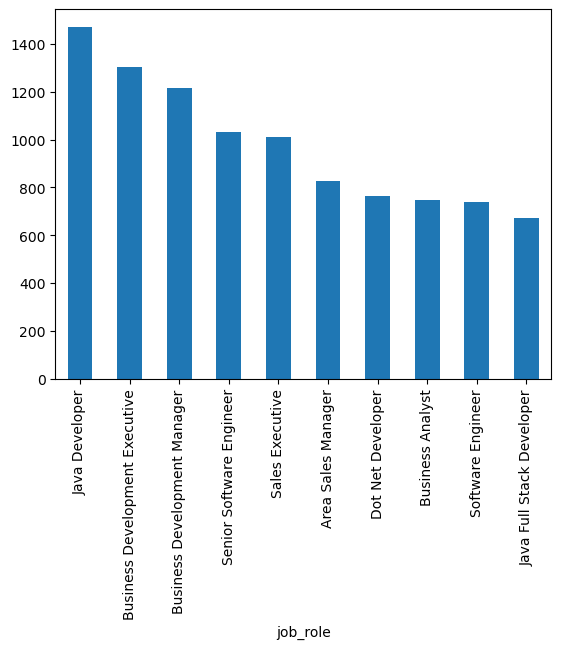

In [30]:
df['job_role'].value_counts().head(10).plot(kind = 'bar')


## Top Job Roles demanded in the market
### Most number of Companies are looking to hire Java Developers followed by Business development executive and manager

In [31]:
top_companies = df['company'].value_counts().head(10)

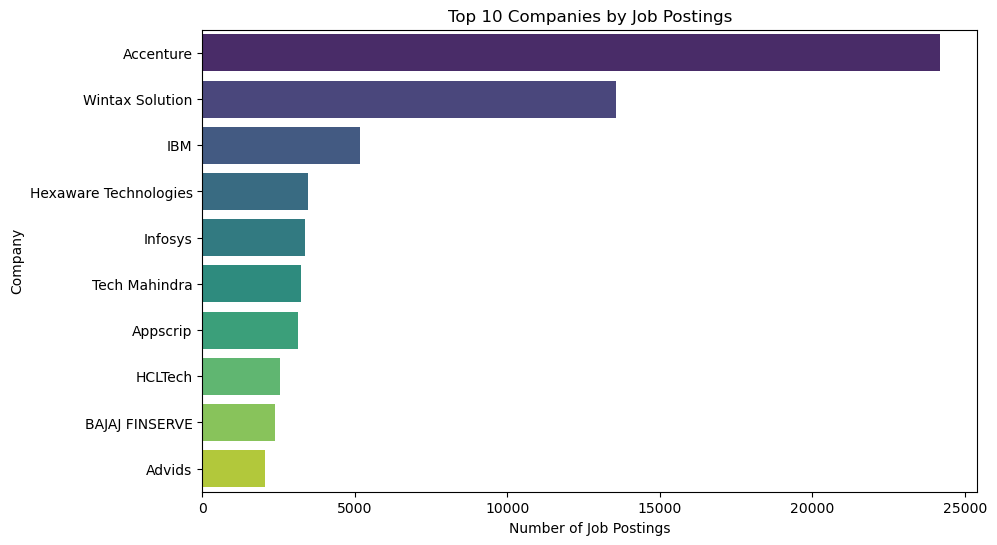

In [32]:
top_companies = top_companies.reset_index()
top_companies.columns = ['company', 'count']  # Rename columns for clarity

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='company', data=top_companies, palette='viridis')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.show()

### **Top 10 Companies Hiring**
### Here, I identify the top 10 companies based on the number of job postings. This helps job seekers focus on organizations actively hiring.

### The bar chart shows the companies with the most postings.

#### **Insights:**
### - **Accenture** has the highest number of job postings followed by ** Wintax Solutions** and **IBM**.
### - The majority of job postings are concentrated among a few companies.


In [33]:
top_locations = df['location'].value_counts().head(10)

In [34]:
top_locations


location
bangalore/bengaluru       47462
hyderabad/secunderabad    20279
mumbai                    17404
pune                      16003
 bangalore/bengaluru      14651
chennai                   13796
gurgaon/gurugram          11527
noida                     11162
 chennai                   8685
 delhi / ncr               8177
Name: count, dtype: int64

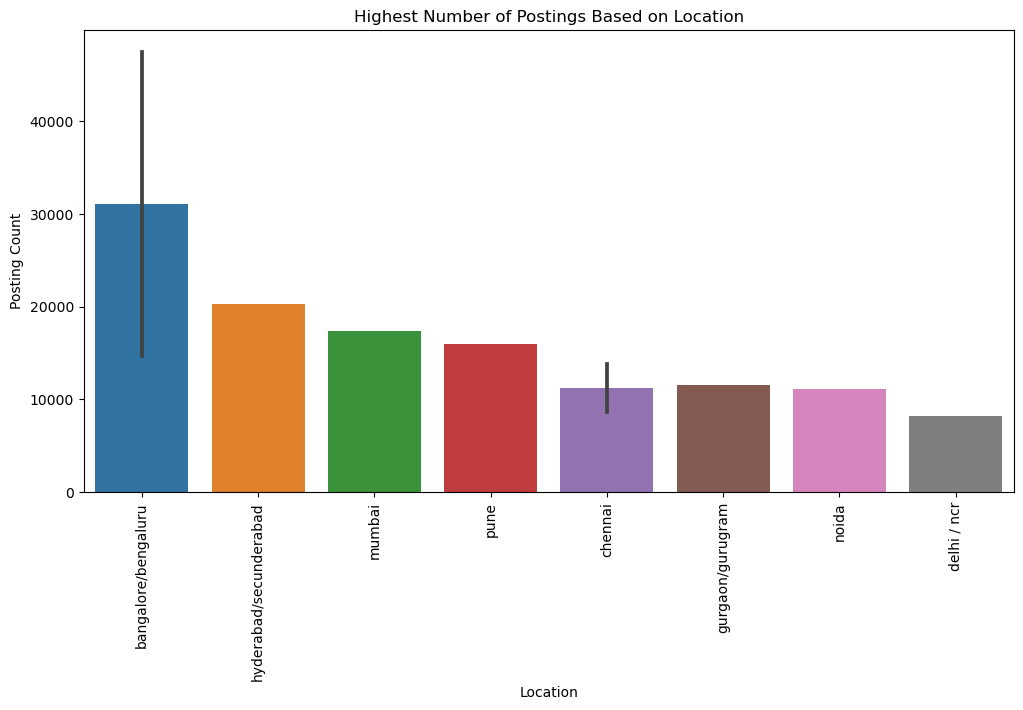

In [35]:
top_locations = top_locations.reset_index()
top_locations.columns = ['location', 'count']

# Strip leading and trailing spaces from the location column
top_locations['location'] = top_locations['location'].str.strip()

# Now rename the columns correctly
top_locations.columns = ['location', 'count']

# Drop the extra index column if it exists
top_locations = top_locations.drop(columns=['index'], errors='ignore')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='count', data=top_locations)
plt.title("Highest Number of Postings Based on Location")
plt.xlabel("Location")
plt.ylabel("Posting Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


## **Top Locations for Job Postings**
### In this section, I analyze the locations with the most job opportunities.

### The bar chart highlights cities where job postings are concentrated, helping job seekers identify geographic job hubs.


## **Insights:**
### - **Bangalore**  is the top city with the highest job postings.
### - These top 10 cities act as major job markets, particularly for roles in technology and business sectors.


In [49]:
top_review = df.groupby('company')['reviews'].count().sort_values(ascending = False).head(10)

In [50]:
top_review

company
Accenture                24197
Wintax Solution          13562
IBM                       5166
Hexaware Technologies     3466
Infosys                   3369
Tech Mahindra             3233
Appscrip                  3126
HCLTech                   2538
BAJAJ FINSERVE            2385
Advids                    2048
Name: reviews, dtype: int64

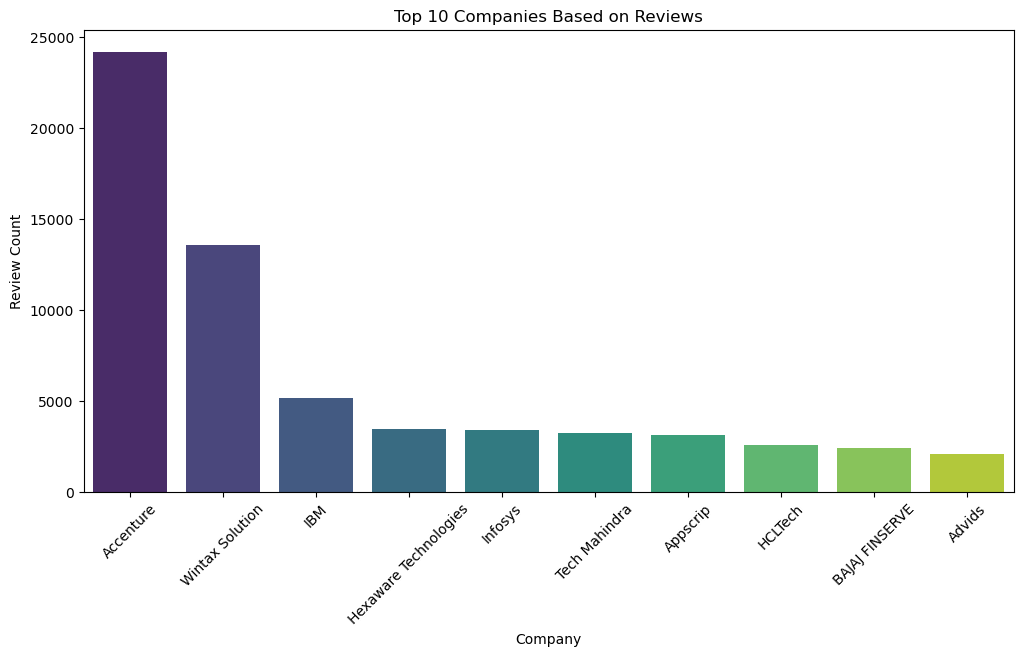

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_review.index, y=top_review.values, palette='viridis')
plt.title('Top 10 Companies Based on Reviews')
plt.xlabel('Company')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()

## **Top Locations for Job Postings**
### In this section, I analyze the companies with the most reviews.

### The bar chart highlights companies with most number reviews, helping job seekers identify positives and negatives of the company they want to join.


## **Insights:**
### - **Accenture**, **Wintax Solutions** and **IBM**  hold the top 3 Based on Reviews
### - These reviews showcases these companies have huge employee counts compared to others


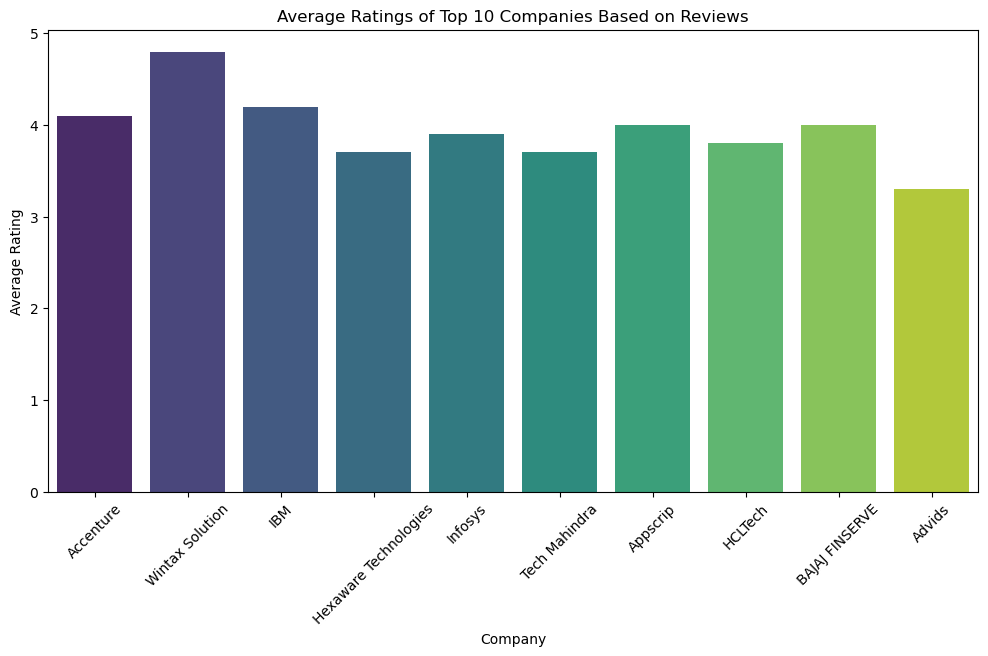

In [52]:
top_companies_df = df[df['company'].isin(top_review.index)]

# Step 3: Calculate average rating for each of the top 10 companies
top_companies_ratings = (
    top_companies_df.groupby('company')['rating']
    .mean()
    .reindex(top_review.index)  # Ensure the order matches top 10 companies
)

# Step 4: Plot the ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies_ratings.index, y=top_companies_ratings.values, palette='viridis')
plt.title("Average Ratings of Top 10 Companies Based on Reviews")
plt.xlabel("Company")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## **Average Rating ** 

# **Conclusion**
## This analysis of job postings highlights key trends in the job market:
### 1. **Top Companies**: The majority of postings are from a few organizations.
### 2. **Top Locations**: Bangalore and Hyderabad dominate the job market.
### 3. **Experience Trends**: Most roles require 2-5 years of experience.
### 4. **Responsibilities**: Understanding common tasks helps candidates prepare better for applications.


### This project provides actionable insights for job seekers and industry analysts looking to understand job market trends.

